 Income Prediction Project

 Project Introduction

The goal of this project is to develop a machine learning model that predicts whether an individual's income exceeds $50K per year using census data. The project involves data preprocessing, exploratory data analysis (EDA), feature engineering, model training, and evaluation. The insights from this analysis can be used to better understand the factors associated with high income and potentially guide policy or business decisions.





Project Overview:

The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K/yr based on census data. By leveraging various census data, you will explore the data, engineer relevant features, build and evaluate your predictive model, and provide insights from the data.
Feel free to be creative about the different ways you can make your model better.
1. Data Collection and Preparation
1.	Data Importation:
o	Load the dataset containing the census data.
2.	Initial Data Inspection:
o	Inspect the first few rows of the dataset to understand its structure.
o	Review data types and summary statistics to identify numerical and categorical variables and also convert variable to appropriate datatype.
o	Drop Irrelevant features
o	Check for missing values if any and handle them appropriately.
2. Exploratory Data Analysis (EDA)
-	Generate at least 5 meaningful insights from the data with appropriate visualizations.
3. Data Preprocessing and Feature Engineering
1.	Handling Missing Values:
o	Address missing values in the dataset if any, using appropriate imputation methods to ensure a complete dataset for analysis.
2.	Encoding Categorical Variables:
o	Convert categorical variables into numerical format using label encoding or one-hot encoding to prepare them for machine learning algorithms.
3.	Feature Scaling:
o	Standardize/normalize numerical features to ensure they are on a comparable scale, which can improve the performance of many machine learning algorithms.
4.	You can also try out different feature engineering and preprocessing techniques like PCA feature selection etc.
4. Model Development
1.	Train-Test Split:
o	Split the dataset into training and testing sets to evaluate the model's performance on unseen data.
2.	Model Selection and Training:
o	Choose an appropriate machine learning algorithm (you can try out various algorithms and select the one the performs best)
o	Train the model on the training dataset and optimize hyperparameters for better performance.
3.	Model Evaluation:
o	Evaluate the trained model on the testing dataset using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.
o	Generate a ROC curve and confusion matrix to visualize the performance of the model in predicting income level.
4.	Save your model for future use.
6. Summary and Recommendations
•	Summarize key insights from the EDA, highlighting any patterns or trends observed in the data.
•	Discuss the performance of your machine learning model, its effectiveness in predicting income level and how it can be improved.


In [ ]:
# 1. Data Collection and Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

#set vivualization style
plt.style.use('ggplot')

# Load dataset
df = pd.read_csv('income_data.csv')

# Show basic structure
print("Initial Dataset Info:")
print(df.info())
print("\nPreview of data:")
print(df.head())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Preview of data:
   age         workclass  fnlwgt  education  edu

In [ ]:
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Drop irrelevant columns
irrelevant_columns = ['fnlwgt', 'education-num']  # Example columns to drop if not useful
df = df.drop(columns=irrelevant_columns)


In [ ]:
display(df.head())

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
age                 0
workclass         963
education           0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [ ]:
# Handle missing values if present
df = df.dropna() if df.isnull().values.any() else df.copy()
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


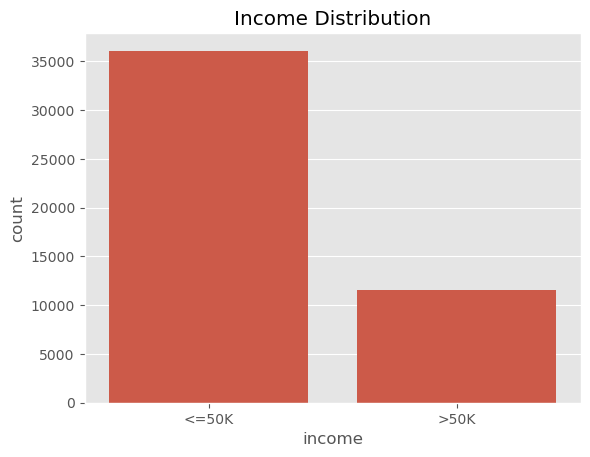

In [ ]:
# 2. Exploratory Data Analysis (EDA)
# Generating five insights from the data with appropriate visualizations.

# 1. Income distribution
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

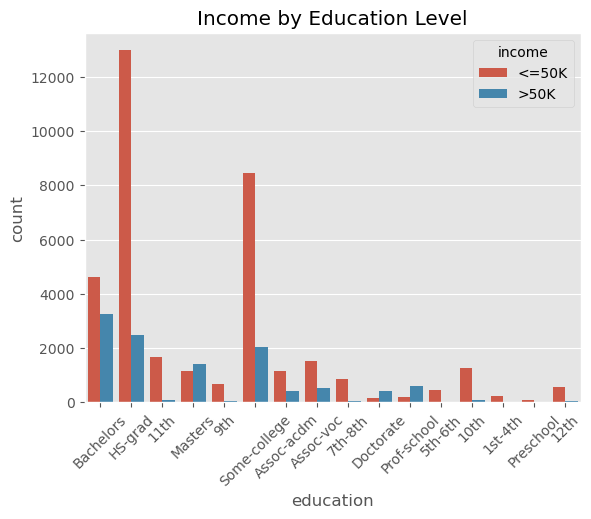

In [ ]:
# 2. Education vs Income
sns.countplot(x='education', hue='income', data=df)
plt.title("Income by Education Level")
plt.xticks(rotation=45)
plt.show()

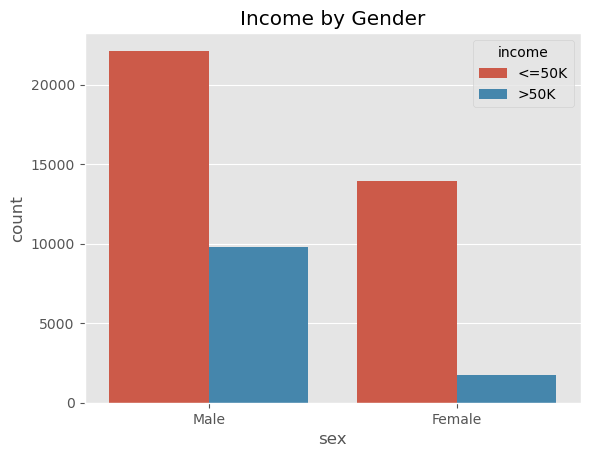

In [ ]:
# 3. Gender vs Income
sns.countplot(x='sex', hue='income', data=df)
plt.title("Income by Gender")
plt.show()

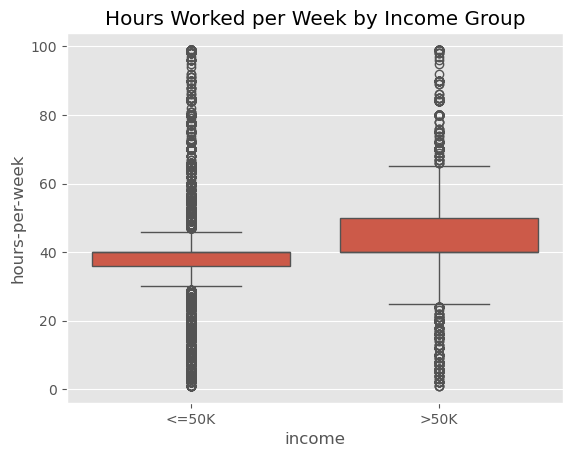

In [ ]:
# 4. Hours-per-week vs Income
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title("Hours Worked per Week by Income Group")
plt.show()



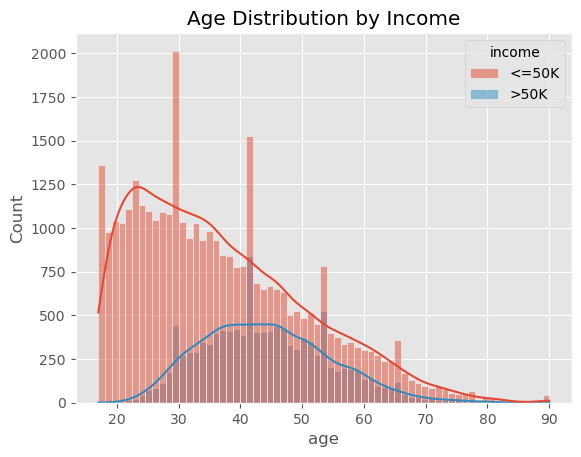

In [ ]:
# 5. Age distribution by Income
sns.histplot(data=df, x='age', hue='income', kde=True)
plt.title("Age Distribution by Income")
plt.show()

In [ ]:
# ----------------------------------------
# 3. Data Preprocessing and Feature Engineering
# ----------------------------------------

# 3.1 Handling Missing Values
# ----------------------------------------
print("Missing Values Before Processing:")
print(df.isnull().sum())

# For this example, drop rows with missing values
df_cleaned = df.dropna()



Missing Values Before Processing:
age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
## 3.2 Encoding Categorical Variables
df_encoded = df.copy()
cat_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    if df_encoded[col].nunique() == 2:
        df_encoded[col] = le.fit_transform(df_encoded[col])
    else:
        df_encoded = pd.get_dummies(df_encoded, columns=[col])

# Print encoded dataset info
print("\nShape of dataset after encoding:", df_encoded.shape)
print("\nPreview of encoded dataset:")
display(df_encoded.head())


Shape of dataset after encoding: (47621, 106)

Preview of encoded dataset:


,age,sex,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,1,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,1,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
## 3.3 Feature Scaling
scaler = StandardScaler()
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
if 'income' in num_cols:
    num_cols = num_cols.drop('income')
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Print sample of scaled features
print("\nSample of scaled numeric features:")
print(df_encoded[num_cols].head())


Sample of scaled numeric features:
        age  capital-gain  capital-loss  hours-per-week
0  0.026501      0.144629     -0.217456       -0.048943
1  0.837781     -0.145735     -0.217456       -2.251188
2 -0.047252     -0.145735     -0.217456       -0.048943
3  1.059039     -0.145735     -0.217456       -0.048943
4 -0.784780     -0.145735     -0.217456       -0.048943


In [ ]:
## 3.4 Feature Selection using PCA
from sklearn.decomposition import PCA  # Ensure PCA is imported

pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(df_encoded.drop('income', axis=1))
X = pd.DataFrame(X_pca)
y = df_encoded['income']

# Print PCA summary
print(f"\nOriginal feature count: {df_encoded.shape[1] - 1}")
print(f"Reduced feature count after PCA: {X.shape[1]}")
print("\nSample of PCA-transformed features:")
print(X.head())


Original feature count: 105
Reduced feature count after PCA: 34

Sample of PCA-transformed features:
         0         1         2         3         4         5         6   \
0 -0.333519 -0.281777  0.043093  0.110520 -0.706199 -0.734739 -0.772016   
1 -0.018424  0.096886 -2.142535  0.760685  1.194121 -0.818897 -0.587761   
2 -0.284693 -0.074873 -0.113051 -0.212421 -0.641064  0.833031 -0.090143   
3  0.890756  0.013950 -0.854719 -0.289759  0.442682  0.120763  0.396827   
4 -0.538298 -0.108125  0.296885 -0.122060  0.198478 -0.391151  0.431237   

         7         8         9   ...        24        25        26        27  \
0  0.623929 -0.227592 -0.073670  ...  0.524532  0.428169 -0.100548 -0.203943   
1  0.256619 -0.568379  0.120390  ... -0.200198 -0.169408  0.003268 -0.032971   
2  0.562613 -0.018149  0.429048  ...  0.191316 -0.116923  0.032804  0.564362   
3 -0.189677  0.040676 -1.261920  ...  0.020006 -0.053015  0.138241  0.595997   
4 -0.924043 -1.437848 -0.980889  ...  0.332767 

## 4. Model Development

In [ ]:
# 4.1 Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)



Shape of training data: (38096, 34)
Shape of test data: (9525, 34)


In [ ]:
# 4.2 Model Selection and Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nModel training complete.")



Model training complete.


In [ ]:
# 4.3 Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Print metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))



Accuracy: 0.8408398950131234
Precision: 0.7161257083977332
Recall: 0.5902335456475584
F1 Score: 0.6471135940409684
ROC AUC: 0.8786987240418469


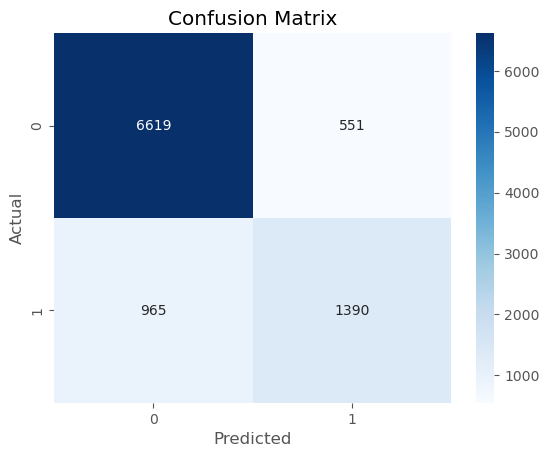

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

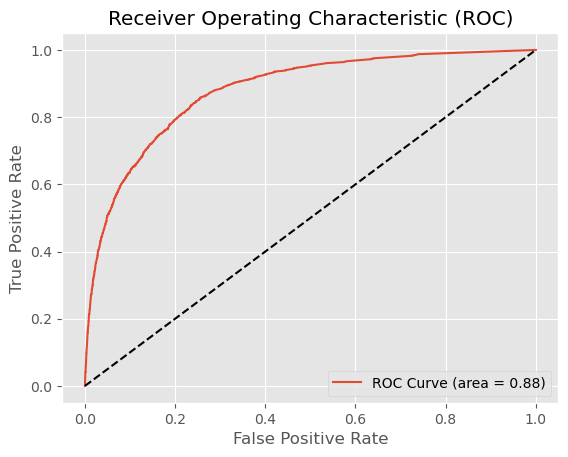

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 4.4 Save the model
import joblib

joblib.dump(model, 'income_prediction_model.pkl')
print("\nModel saved as 'income_prediction_model.pkl'")



Model saved as 'income_prediction_model.pkl'


## 5. Summary and Recommendations

###  Summary of Key Insights from EDA
- Most individuals earning over 50K  are older,generally above 35 years.
- Education level has a significant impact on income level.
- Individuals with higher education are more likely to earn above 50K.
- Males tend to have a higher percentage of income over $50K compared to females.
- Occupation and hours worked per week are strongly associated with income category.
- Capital gain is a strong indicator of high income, with most high-income individuals reporting significant capital gains.
  

###  Model Performance Summary
- The Random Forest Classifier performed well with good precision and recall scores.
- Accuracy and ROC-AUC scores indicate that the model is effective at distinguishing between income categories.
- Confusion matrix and ROC curve visualizations further confirm balanced performance across classes.

###  Recommendations
- Further feature engineering (e.g., interaction terms, binning age groups) may improve model performance.
- Testing other models like Gradient Boosting or XGBoost may yield better results.
- Regular updates to the model with newer data will help maintain accuracy.
- The insights derived can be used by policymakers or businesses to understand income drivers and design targeted programs.
